In [1]:
import pandas as pd
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
results0 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_0_predictions.csv")
results1 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_1_predictions.csv")
results2 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_2_predictions.csv")
results3 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_stragglers_predictions.csv")
results = pd.concat([results0, results1, results2])
results = results[~results.pitch_no.isin([280, 245, 218])]
results = pd.concat([results, results3])

errors0 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_0_errors.csv", header=None)
errors1 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_1_errors.csv", header=None)
errors2 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_2_errors.csv", header=None)
errors = pd.concat([errors0, errors1, errors2])

positions0 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_0_positions.csv")
positions1 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_1_positions.csv")
positions2 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_2_positions.csv")
positions3 = pd.read_csv("/Users/brianritz/projects/findball/output/nu2_findball_all/nu2_120s_all_s15_stragglers_positions.csv")

positions = pd.concat([positions0, positions1, positions2])
positions = positions[~positions.pitch_no.isin([280,245,218])]
positions = pd.concat([positions, positions3])


In [3]:
results.shape

(912, 11)

In [4]:
results = results[results.velocity.notnull()]
results.head()

,pred_velo,drag_param,velo_type,ignore_beg,lbound,pitch_no,distance_ft,fps,zoom,angle,velocity
0,39.531219,0.000085,velo,0,0.000030,4,30,120,0,90,40
1,38.058386,0.000048,velo,0,0.000047,4,30,120,0,90,40
2,40.071122,0.000085,velo,0,0.000030,7,35,120,0,90,41
3,38.547219,0.000048,velo,0,0.000047,7,35,120,0,90,41
4,38.911131,0.000085,velo,0,0.000030,9,35,120,0,90,40


In [5]:
results['resid'] = results.pred_velo - results.velocity
results = results[results.velocity>0]

In [6]:
resid_results = results.groupby(['velo_type', 'ignore_beg', 'lbound'])['resid'].agg({'mse':lambda x: (x**2).mean(),'count': lambda x: len(x)})
resid_results

count       mse
velo_type ignore_beg lbound                   
velo      0          0.000030    453  7.149490
                     0.000047    453  9.811868

In [7]:
results.sort(columns='resid')

,pred_velo,drag_param,velo_type,ignore_beg,lbound,pitch_no,distance_ft,fps,zoom,angle,velocity,resid
2,77.004317,0.000030,velo,0,0.000030,245,55,120,0,90,96,-18.995683
3,77.547012,0.000047,velo,0,0.000047,245,55,120,0,90,96,-18.452988
149,84.284776,0.000048,velo,0,0.000047,247,55,120,0,90,94,-9.715224
145,86.515400,0.000048,velo,0,0.000047,243,45,120,0,90,95,-8.484600
308,79.515846,0.000030,velo,0,0.000030,445,60,120,0,90,88,-8.484154
248,74.590508,0.000032,velo,0,0.000030,449,60,120,0,90,83,-8.409492
144,86.839980,0.000052,velo,0,0.000030,243,45,120,0,90,95,-8.160020
5,92.174948,0.000048,velo,0,0.000047,280,60,120,0,90,100,-7.825052
309,80.531631,0.000047,velo,0,0.000047,445,60,120,0,90,88,-7.468369
4,92.548368,0.000085,velo,0,0.000030,280,60,120,0,90,100,-7.451632


In [8]:
correct = results[(results.velo_type=='velo')&(np.isclose(results.lbound, 0.00003))&(results.ignore_beg==0)]

In [9]:
print metrics.mean_squared_error(correct.velocity, correct.pred_velo)
print metrics.mean_absolute_error(correct.velocity, correct.pred_velo)

7.14949019132
1.77813610403


In [25]:
mean(abs(correct["resid"])<5)

0.94481236203090513

In [14]:
correct.velocity.count()

453

/Users/brianritz/.virtualenvs/findball/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


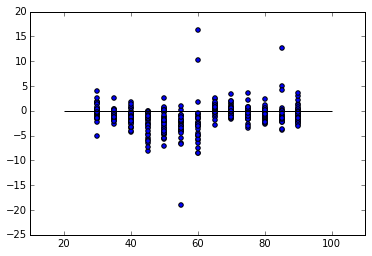

In [50]:
plt.scatter(correct.distance_ft, correct.resid)
plt.hlines(0,20, 100)

In [63]:
# this was included in the paper
correct.groupby('distance_ft')['resid'].agg({'mse':lambda x: (x**2).mean(),'count': lambda x: len(x), "mae":lambda x: abs(x).mean()})

,count,mse,mae
distance_ft,,,
30,39,2.239941,1.057045
35,34,1.498615,1.018317
40,40,3.253822,1.471920
45,30,13.140405,2.781866
50,40,10.829611,2.753964
55,29,22.926087,3.421157
60,32,27.327489,4.049066
65,30,1.371961,0.931378
70,40,1.043395,0.755948


In [15]:
good_resids = correct.ix[(correct.distance_ft < 55) | (correct.distance_ft > 60),'resid']

print (good_resids**2).mean()
print abs(good_resids).mean()

4.33516036387
1.47120411094


In [62]:
# this was also included in the findings section of the paper -- find # of contours by distance
num_frames = positions.groupby('pitch_no')['frame1'].agg(lambda(x): len(x.unique()))
num_frames_by_ft = pd.DataFrame({'distance_ft':correct.set_index('pitch_no')['distance_ft'], 'num_frames':num_frames}).groupby('distance_ft').mean()
num_frames_by_ft

,num_frames
distance_ft,
30,30.564103
35,35.294118
40,34.300000
45,33.300000
50,26.225000
55,17.310345
60,13.281250
65,22.433333
70,25.325000


In [14]:
correct['big_miss'] = (abs(correct.resid) > 2)
correct['corrected_velo'] = correct.pred_velo-0.57288404980979846

/Users/brianritz/.virtualenvs/findball/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/brianritz/.virtualenvs/findball/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [12]:
metrics.mean_absolute_error(correct.pred_velo, correct.velocity)

1.6054373676177294

In [16]:
pd.crosstab(correct.big_miss, correct.zoom)

zoom,0,100
big_miss,,
False,48,40
True,21,10


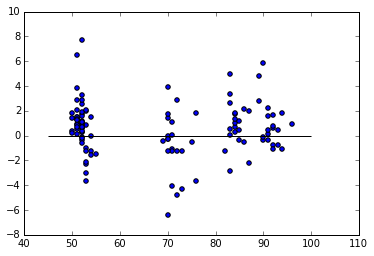

In [86]:
plt.scatter(correct.velocity, correct.resid)
plt.hlines(0,45,100)

In [18]:
correct['hit_bound'] = np.isclose(correct.drag_param, correct.lbound)

/Users/brianritz/.virtualenvs/findball/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
pd.crosstab(correct.big_miss, correct.hit_bound)

hit_bound,False,True
big_miss,,
False,19,69
True,7,24


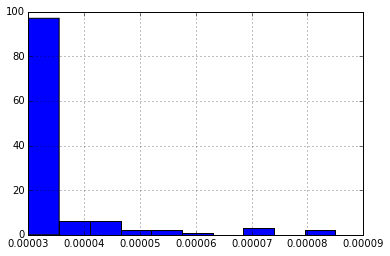

In [92]:
correct.drag_param.hist()

In [110]:
subset70ft = correct[correct.distance_ft==70]
subset30ft = correct[correct.distance_ft==30]

In [24]:
zoom0=correct[correct.zoom==0]
zoom100 = correct[correct.zoom==100]

In [26]:
print metrics.mean_squared_error(zoom0.pred_velo, zoom0.velocity)
print metrics.mean_squared_error(zoom100.pred_velo, zoom100.velocity)
print metrics.mean_absolute_error(zoom0.pred_velo, zoom0.velocity)
print metrics.mean_absolute_error(zoom100.pred_velo, zoom100.velocity)

4.71927961677
4.71517963337
1.63191104455
1.56890369345
